In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
data = pd.read_csv(r'C:\Users\user\Downloads\Dengue\Data\DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [126]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [127]:
df_train_features = pd.read_csv(r'C:\Users\user\Downloads\Dengue\Data\DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv', index_col=[0,1,2])
df_train_labels = pd.read_csv(r'C:\Users\user\Downloads\Dengue\Data\DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv', index_col=[0,1,2])
df_test = pd.read_csv(r'C:\Users\user\Downloads\Dengue\Data\DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv', index_col=[0,1,2])

In [128]:
df_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [129]:
#Exploratory Data Analysis

In [130]:
sj_train_features = df_train_features.loc['sj']
iq_train_features = df_train_features.loc['iq']

sj_test_features = df_test.loc['sj']
iq_test_features = df_test.loc['iq']

sj_train_labels = df_train_labels.loc['sj']
iq_train_labels = df_train_labels.loc['iq']

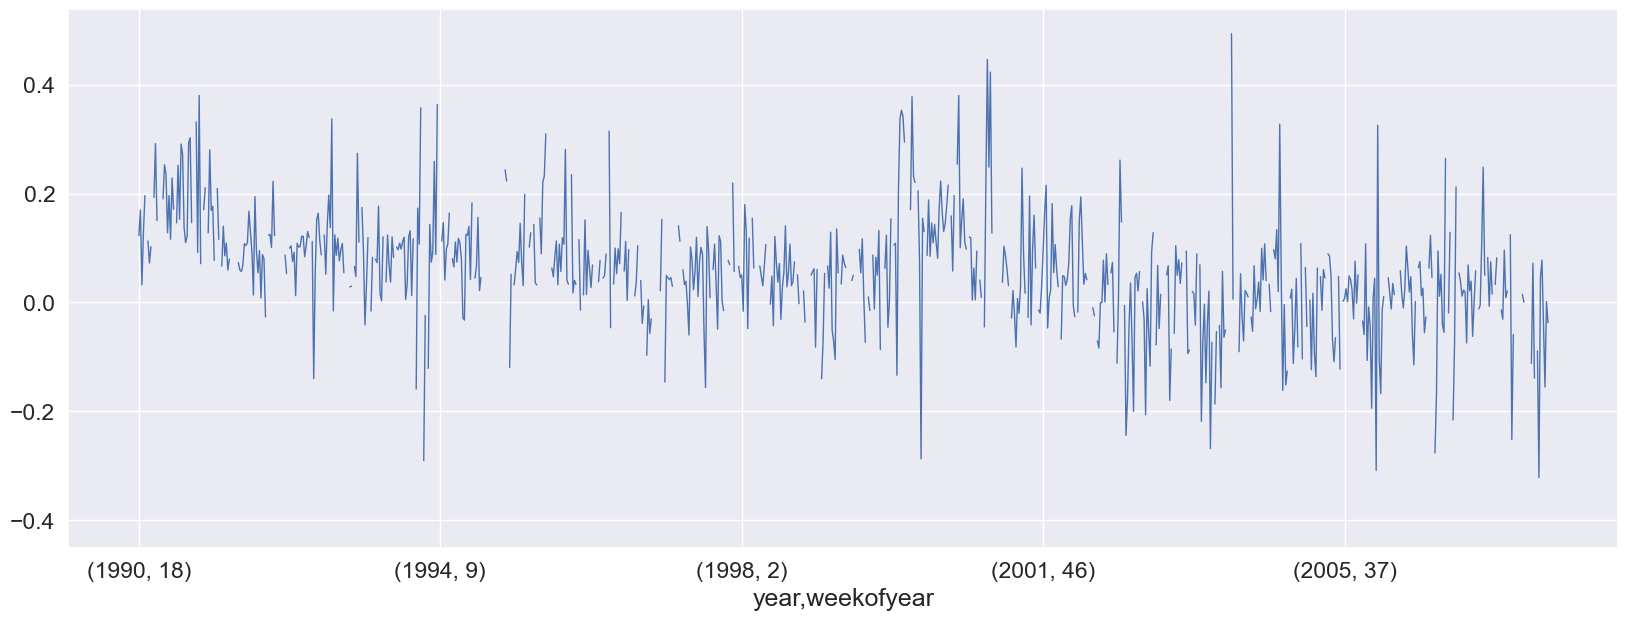

In [131]:
plt.figure(figsize=(20,7))
sj_train_features.ndvi_ne.plot.line(lw=1)
plt.show()

In [132]:
#Above plot shows missing values so need to check other columns too

print(sj_train_features.shape)
sj_train_features.isnull().any(axis=0)

(936, 21)


week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
dtype: bool

In [133]:
print(iq_train_features.shape)
iq_train_features.isnull().any(axis=0)

(520, 21)


week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
dtype: bool

In [134]:
from warnings import filterwarnings
filterwarnings('ignore')

In [135]:
#Fill missing values
sj_train_features.sort_index(inplace=True)
sj_train_features.fillna(method='ffill', inplace=True)
sj_test_features.fillna(method='ffill', inplace=True)

iq_train_features.sort_index(inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)
iq_test_features.fillna(method='ffill', inplace=True)

In [136]:
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

In [137]:
import seaborn as sns

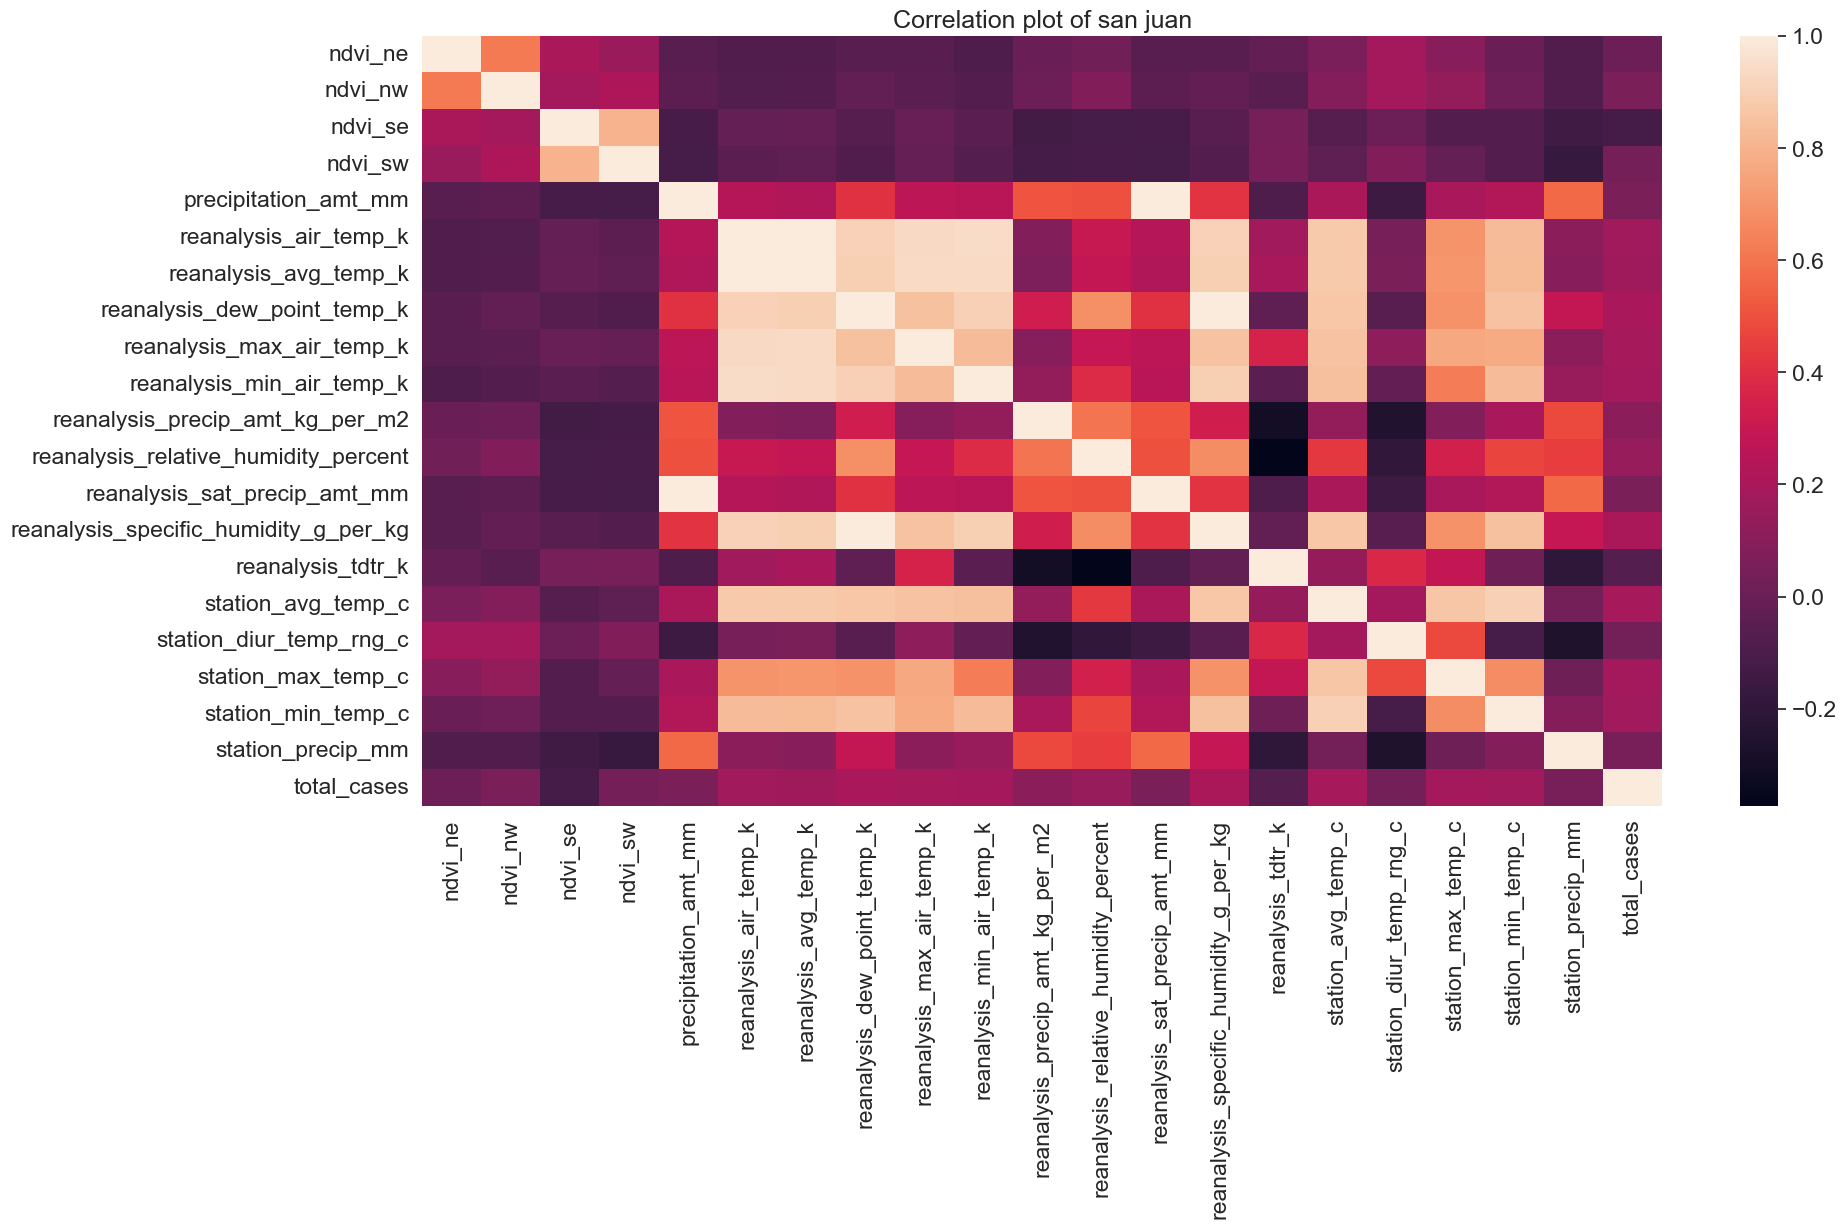

In [138]:
sj_train_features['total_cases'] = sj_train_labels['total_cases']
sj_corr = sj_train_features.corr()

plt.figure(figsize=(20,10))
sns.heatmap(sj_corr)
plt.title('Correlation plot of san juan')
plt.show()

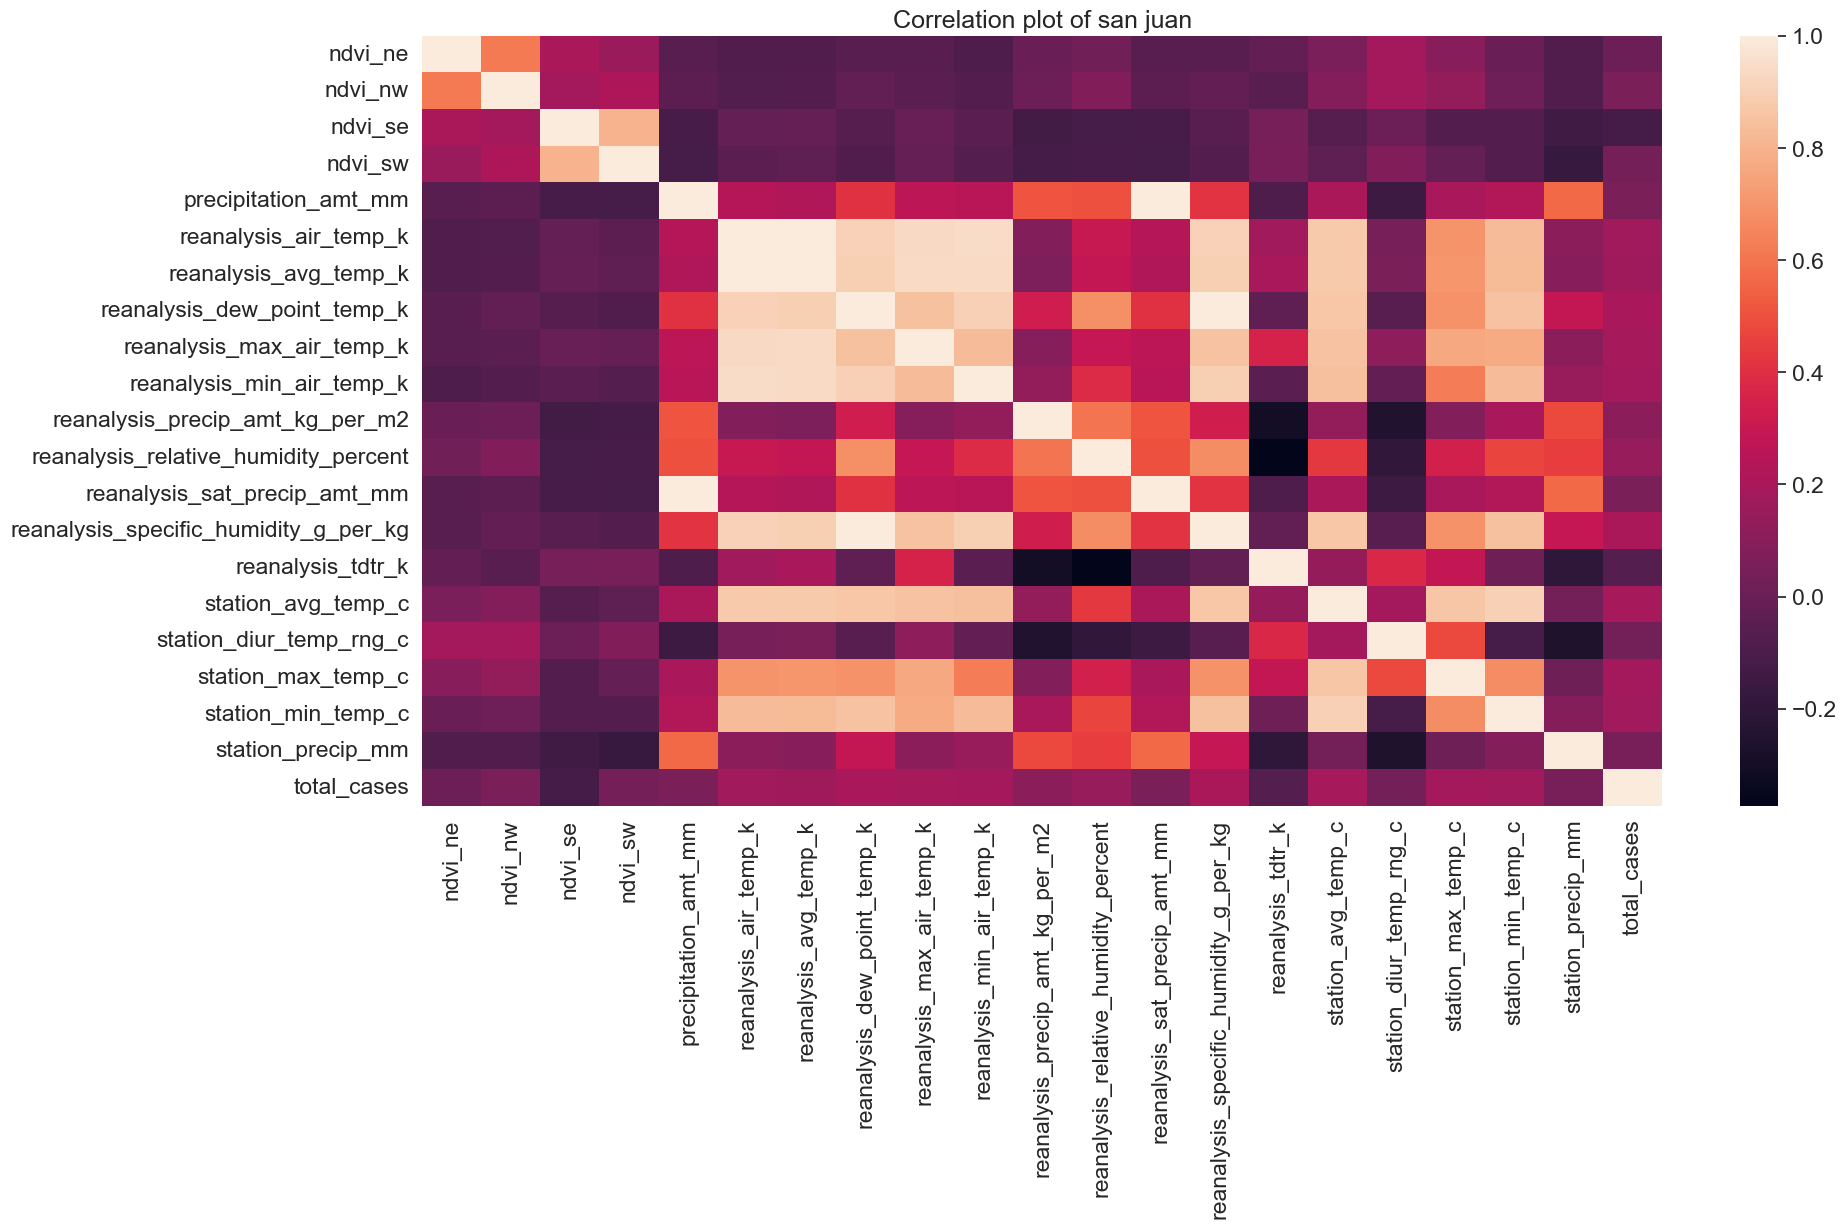

In [139]:
iq_train_features['total_cases'] = iq_train_labels['total_cases']
iq_corr = sj_train_features.corr()

plt.figure(figsize=(20,10))
sns.heatmap(iq_corr)
plt.title('Correlation plot of san juan')
plt.show()

In [140]:
#No single variable seems to be good at predicting total cases

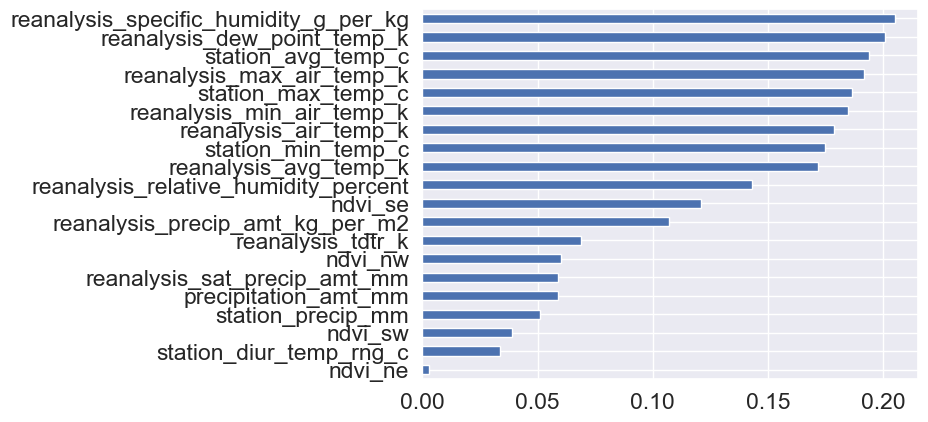

In [141]:
sns.set(font_scale=1.5)
(abs(sj_corr).total_cases.drop('total_cases').sort_values().plot.barh())
plt.show()

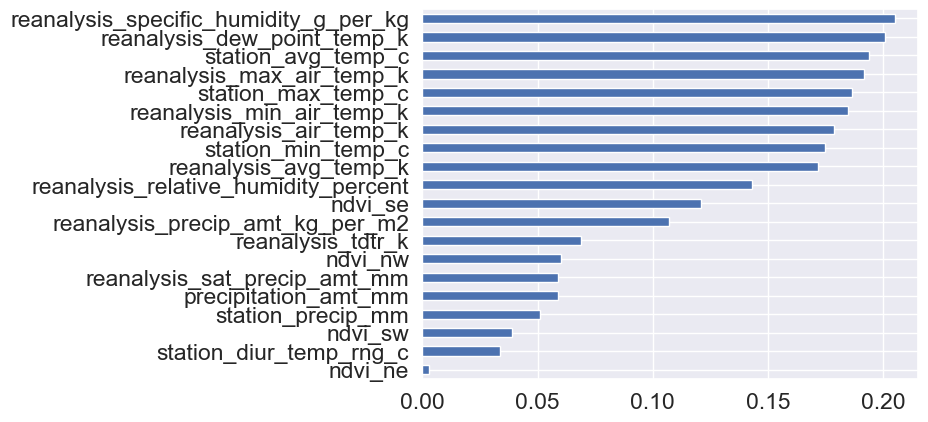

In [142]:
sns.set(font_scale=1.5)
(abs(iq_corr).total_cases.drop('total_cases').sort_values().plot.barh())
plt.show()

In [143]:
#certain variables in both charts might be which are prominent can be the drivers of dengue.
#specific humidity, dew point temperature,minimum temperature etc  

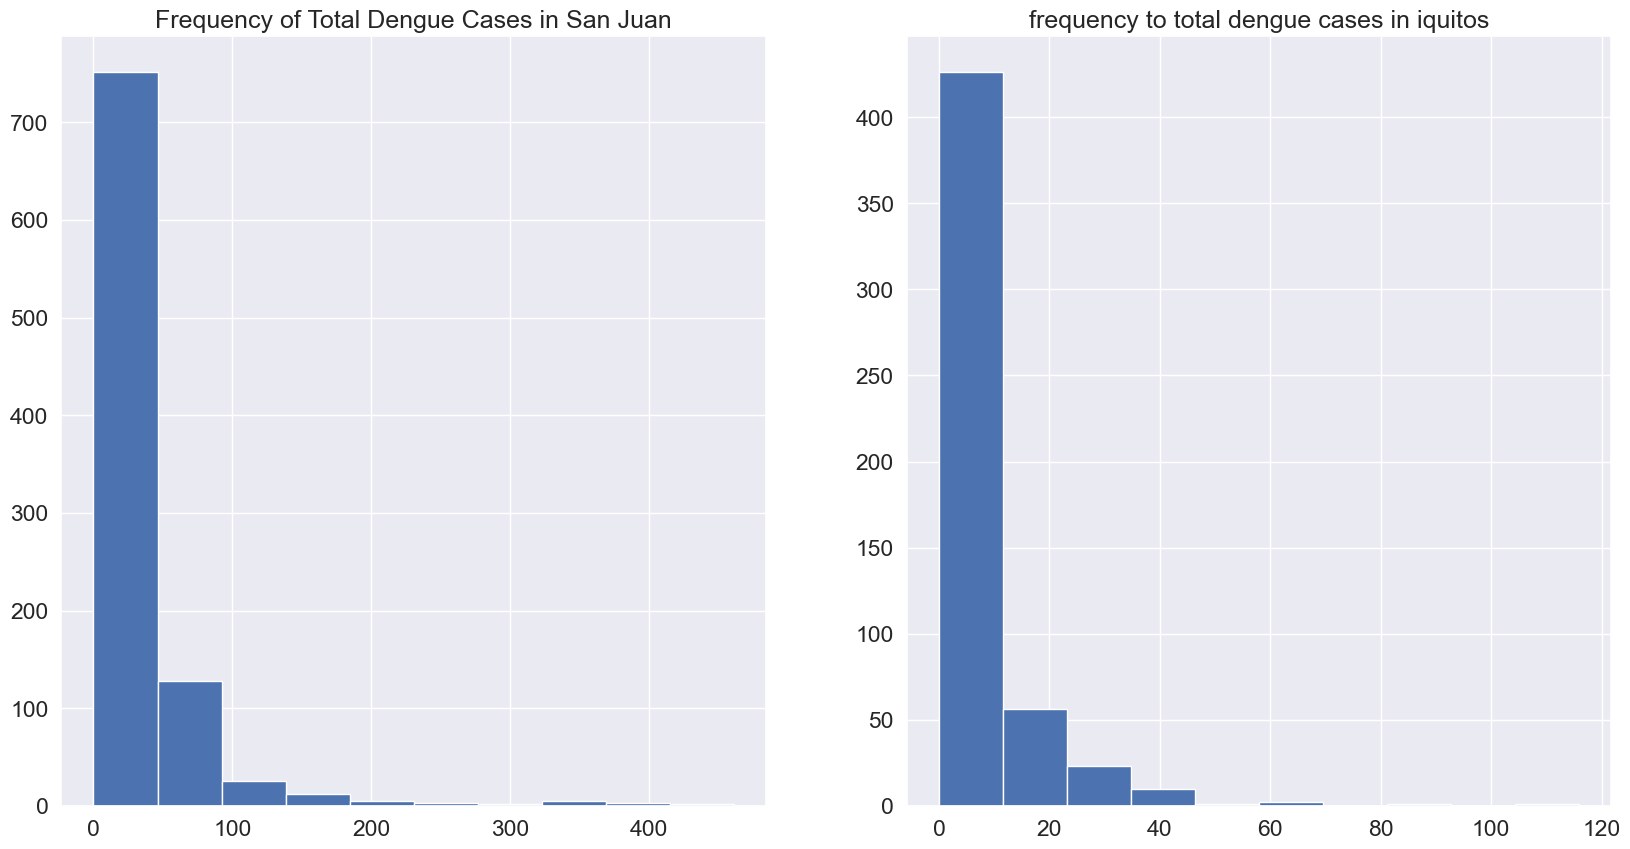

In [144]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(sj_train_features['total_cases'])
plt.title('Frequency of Total Dengue Cases in San Juan')

plt.subplot(1,2,2)
plt.hist(iq_train_features['total_cases'])
plt.title('frequency to total dengue cases in iquitos')

plt.show()

In [145]:
#total cases seem to appear either exponential distribution or a negative binomial distribution

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
#Data is splitted with 750 observations set as our training set

In [148]:
X_sj = sj_train_features.iloc[:,0:20]
y_sj = sj_train_features['total_cases']
X_sj_train, y_sj_train = X_sj.iloc[:750, :], y_sj[0:750]
X_sj_cv, y_sj_cv = X_sj.iloc[751:,:], y_sj[751:]

In [149]:
X_iq = iq_train_features.iloc[:,0:20]
y_iq = iq_train_features['total_cases']
X_iq_train, y_iq_train = X_iq.iloc[:360, :], y_iq[0:360]
X_iq_cv, y_iq_cv = X_iq.iloc[361:,:], y_iq[361:]

In [150]:
#Feature Selection

In [151]:
important_var = abs(iq_corr).total_cases.drop('total_cases').sort_values(ascending= False).index[0:4]

In [152]:
X_sj_temp_train = X_sj_train[important_var]
X_sj_temp_cv = X_sj_cv[important_var]
X_sj_temp_test = sj_test_features[important_var]

X_iq_temp_train = X_iq_train[important_var]
X_iq_temp_cv = X_iq_cv[important_var]
X_iq_temp_test = iq_test_features[important_var]


In [153]:
X_sj_temp_train['y'] = y_sj_train.values
X_sj_temp_cv['y'] = y_sj_cv.values

X_iq_temp_train['y'] = y_iq_train.values
X_iq_temp_cv['y'] = y_iq_cv.values

In [154]:
print(sj_train_features.index[0])
print(iq_train_features.index[0])

(1990, 18)
(2000, 26)


In [155]:
sj_rng = pd.date_range('30/04/1990', periods=len(sj_train_features), freq='W')
iq_rng = pd.date_range('26/06/2000', periods=len(iq_train_features), freq= 'W')

In [156]:
X_sj_temp_train.index = sj_rng[:750]
X_sj_temp_cv.index = sj_rng[751:]

X_iq_temp_train.index = iq_rng[:360]
X_iq_temp_cv.index = iq_rng[361:]

In [157]:
#Creating model

In [158]:
important_var

Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'station_avg_temp_c', 'reanalysis_max_air_temp_k'],
      dtype='object')

In [159]:
#Negative Binomial Regression Model

In [160]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures

In [161]:
def best_nb_model(train, cv):
    formula =  "y ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_max_air_temp_k + " \
                    "station_avg_temp_c" 
    alpha_grid = np.linspace(0.01, 2, 100)
    
    best_alpha = 0; best_mae = 1000
    
    for alpha in alpha_grid:
        model = smf.glm(formula = formula, data = train,
                        family = sm.families.NegativeBinomial(alpha = alpha))
        nb_model = model.fit()
        
        cv_pred = list(map(int, map(round, nb_model.predict(cv))))
        cv_y = list(cv.y)
        mae = eval_measures.meanabs(cv_pred, cv_y)

        
        if mae < best_mae:
            best_mae = mae
            best_alpha = alpha
            
    total = pd.concat([train, cv])
    
    print('Negative Binomial Model: ', best_mae)
    return smf.glm(formula = formula, data = total,
                   family = sm.families.NegativeBinomial(alpha = best_alpha)).fit()

In [162]:
#poisson model

In [163]:
def best_poisson_model(train, cv):
    formula =  "y ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_max_air_temp_k + " \
                    "station_avg_temp_c" 
    
    model = smf.glm(formula = formula, data = train,
                    family = sm.families.Poisson())
    poisson_model = model.fit()
        
    cv_pred = list(map(int, map(round, poisson_model.predict(cv))))
    cv_y = list(cv.y)
    mae = eval_measures.meanabs(cv_pred, cv_y)

        
    total = pd.concat([train, cv])
    
    print('Poisson Regression Model: ', mae)
    return smf.glm(formula = formula, data = total,
                   family = sm.families.Poisson()).fit()

In [164]:
#Linear Regression with L2

In [165]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

def best_ridge_model(train, cv):
    ridge = Ridge(random_state=10)
    
    param_grid = {'alpha': np.logspace(-5, 3, 50)}
    
    model = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=10)
    
    X_var = important_var
    ridgereg = model.fit(train[X_var], train.y)
    
    cv_pred = list(map(int, map(round, ridgereg.predict(cv[X_var]))))
    cv_y = list(cv.y)
    mae = eval_measures.meanabs(cv_pred, cv_y)
        
    total = pd.concat([train, cv])
    
    print('Ridge Regression Model:', mae)
    return model.fit(total[X_var], total.y)


In [166]:
#Linear Regression with L1

In [167]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

def best_lasso_model(train, cv):
    lasso = Lasso(random_state=10)

    # Feature Scaling
    scaler = StandardScaler()
    X_var = important_var
    train_scaled = scaler.fit_transform(train[X_var])
    cv_scaled = scaler.transform(cv[X_var])

    param_grid = {'alpha': np.logspace(-5, 3, 50)}

    model = GridSearchCV(lasso, param_grid, scoring='neg_mean_absolute_error', cv=10)
    lassoreg = model.fit(train_scaled, train.y)

    cv_pred = list(map(int, map(round, lassoreg.predict(cv_scaled))))
    cv_y = list(cv.y)
    mae = eval_measures.meanabs(cv_pred, cv_y)

    total = pd.concat([train, cv])

    print('Lasso Regression Model:', mae)
    return model.fit(scaler.transform(total[X_var]), total.y)



In [168]:
best_nb_model(X_sj_temp_train, X_sj_temp_cv)
best_nb_model(X_iq_temp_train, X_iq_temp_cv)

best_poisson_model(X_sj_temp_train, X_sj_temp_cv)
best_poisson_model(X_iq_temp_train, X_iq_temp_cv)

best_ridge_model(X_sj_temp_train, X_sj_temp_cv)
best_ridge_model(X_iq_temp_train, X_iq_temp_cv)

best_lasso_model(X_sj_temp_train, X_sj_temp_cv)
best_lasso_model(X_iq_temp_train, X_iq_temp_cv)


Negative Binomial Model:  24.967567567567567
Negative Binomial Model:  7.314465408805032
Poisson Regression Model:  25.183783783783785
Poisson Regression Model:  7.30188679245283
Ridge Regression Model: 25.54054054054054
Ridge Regression Model: 7.352201257861635
Lasso Regression Model: 26.562162162162164
Lasso Regression Model: 7.320754716981132


GridSearchCV(cv=10, estimator=Lasso(random_state=10),
             param_grid={'alpha': array([1.00000000e-05, 1.45634848e-05, 2.12095089e-05, 3.08884360e-05,
       4.49843267e-05, 6.55128557e-05, 9.54095476e-05, 1.38949549e-04,
       2.02358965e-04, 2.94705170e-04, 4.29193426e-04, 6.25055193e-04,
       9.10298178e-04, 1.32571137e-03, 1.93069773e-03, 2.81176870e-03,
       4.09491506e-03, 5.96362332e-03, 8...
       3.72759372e-01, 5.42867544e-01, 7.90604321e-01, 1.15139540e+00,
       1.67683294e+00, 2.44205309e+00, 3.55648031e+00, 5.17947468e+00,
       7.54312006e+00, 1.09854114e+01, 1.59985872e+01, 2.32995181e+01,
       3.39322177e+01, 4.94171336e+01, 7.19685673e+01, 1.04811313e+02,
       1.52641797e+02, 2.22299648e+02, 3.23745754e+02, 4.71486636e+02,
       6.86648845e+02, 1.00000000e+03])},
             scoring='neg_mean_absolute_error')

In [169]:
#Negative Binomial is working better is both datasets, MAE is 24 and 7

In [170]:
best_sj_model = best_nb_model(X_sj_temp_train, X_sj_temp_cv)
best_iq_model = best_nb_model(X_iq_temp_train, X_iq_temp_cv)

Negative Binomial Model:  24.967567567567567
Negative Binomial Model:  7.314465408805032


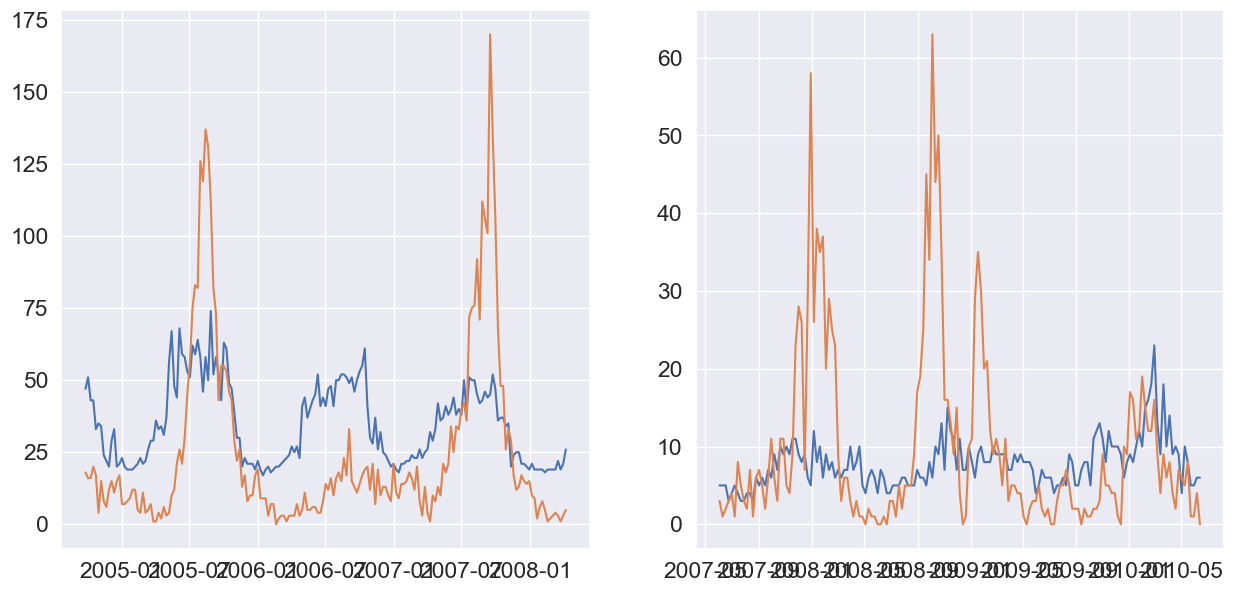

In [171]:
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.plot(best_sj_model.predict(X_sj_temp_cv).astype(int), '-')
plt.plot(X_sj_temp_cv.y, '-')

plt.subplot(1, 2, 2)
plt.plot(best_iq_model.predict(X_iq_temp_cv).astype(int), '-')
plt.plot(X_iq_temp_cv.y, '-')

plt.show()

In [172]:
#Model is not able to caputure the major dengue flux in total cases in both of the cities.